<a href="https://colab.research.google.com/github/Vicky-0222/ML/blob/master/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Финализация умений

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/employee.csv')

df.department = df.department.astype('category')
df.salary = df.salary.astype('category')
df.time_spend_company = df.time_spend_company.astype('category')

In [ ]:
y_regression = df['satisfaction_level'] # числовая переменная как y
X_regression = df.copy().drop('satisfaction_level', axis=1).reindex() # переменные для проверки влияния

y_classification = df['time_spend_company'] # категориальная переменная как y
X_classification = df.copy().drop('time_spend_company', axis=1).reindex() # переменные для проверки влияния

In [ ]:
X_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   last_evaluation        14999 non-null  float64 
 1   number_project         14999 non-null  category
 2   average_montly_hours   14999 non-null  int64   
 3   time_spend_company     14999 non-null  int64   
 4   Work_accident          14999 non-null  int64   
 5   promotion_last_5years  14999 non-null  int64   
 6   department             14999 non-null  category
 7   salary                 14999 non-null  category
 8   left                   14999 non-null  int64   
dtypes: category(3), float64(1), int64(5)
memory usage: 747.9 KB


## Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
# Выделение числовых и категориальных колонок
numerical_features_regression = X_regression.select_dtypes(include=['float64', 'int64']).columns
categorical_features_regression = X_regression.select_dtypes(include=['category']).columns

numerical_features_classification = X_classification.select_dtypes(include=['float64', 'int64']).columns
categorical_features_classification = X_classification.select_dtypes(include=['category']).columns

# Создание трансформеров
preprocessor_regression = ColumnTransformer(
  [
    ('num', StandardScaler(), numerical_features_regression),
    ('cat', OneHotEncoder(), categorical_features_regression),
  ],
  verbose=True
)

preprocessor_classification = ColumnTransformer(
  [
    ('num', StandardScaler(), numerical_features_classification),
    ('cat', OneHotEncoder(), categorical_features_classification)
  ],
  verbose=True
)

### Для регрессии

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Разделение данных
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

# Пайплайн для регрессии
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),  # Включает StandardScaler и OneHotEncoder
    ('regressor', LinearRegression())          # Модель
], verbose=True)

# Обучение модели
regression_pipeline.fit(X_train_reg, y_train_reg)

# Предсказания
y_pred_reg = regression_pipeline.predict(X_test_reg)

# Метрики для регрессии
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)

print(f"\nСреднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Корень из MSE (RMSE): {rmse:.4f}")
print(f"Средний абсолютный процент ошибки (MAPE): {mape:.4f}, то есть {mape * 100:.4f}%")


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.2s

Среднеквадратичная ошибка (MSE): 0.0410
Корень из MSE (RMSE): 0.2024
Средний абсолютный процент ошибки (MAPE): 0.4197, то есть 41.9720%


### Тоже самое для классификации

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Разделение данных
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Пайплайн для классификации
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),  # Включает StandardScaler и OneHotEncoder
    ('classifier', DecisionTreeClassifier(random_state=42))
], verbose=True)

# Обучение модели
classification_pipeline.fit(X_train_clf, y_train_clf)

# Предсказания
y_pred_clf = classification_pipeline.predict(X_test_clf)
y_pred_proba_clf = classification_pipeline.predict_proba(X_test_clf)

# Метрики для классификации
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')
auc = roc_auc_score(y_test_clf, y_pred_proba_clf, multi_class='ovr', average='weighted')
logloss = log_loss(y_test_clf, y_pred_proba_clf)

print(f"Точность (accuracy): {accuracy:.4f}")
print(f"Точность (precision): {precision:.4f}")
print(f"Полнота (recall): {recall:.4f}")
print(f"F1-мера: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Логарифмическая потеря (log-loss): {logloss:.4f}")


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
Точность (accuracy): 0.5423
Точность (precision): 0.5415
Полнота (recall): 0.5423
F1-мера: 0.5419
AUC: 0.7000
Логарифмическая потеря (log-loss): 16.4724


### Пример использования

Попробуем визуализировать признаки в 2D и 3D пространстве алгоритмами PCA и T-SNE

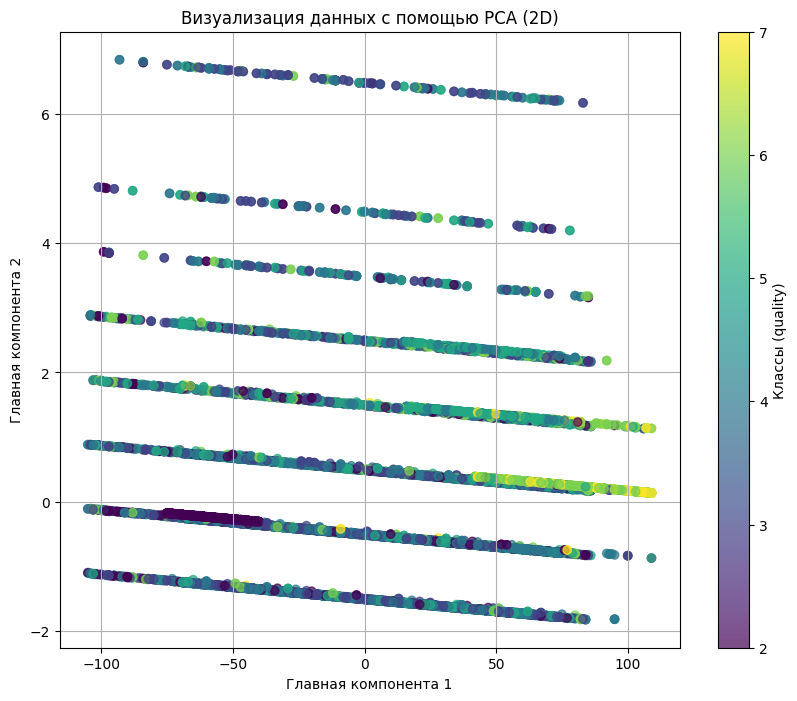

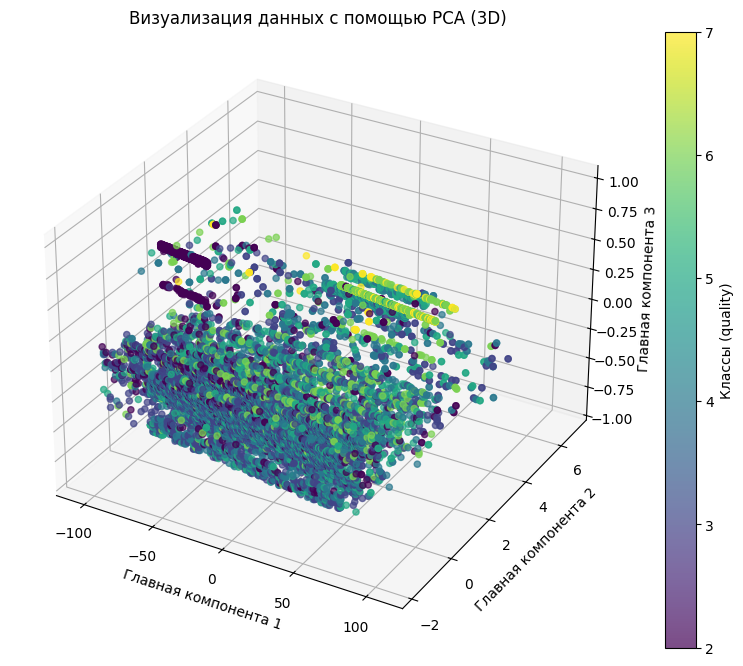

Точность классификации с PCA (2D): 0.5413
Точность классификации с PCA (3D): 0.5563


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# Преобразование данных с помощью PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

# 2D визуализация PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Классы (time_spend_company)')
plt.title("Визуализация данных с помощью PCA (2D)")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.grid(True)
plt.show()

# 3D визуализация PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Классы (time_spend_company)')
ax.set_title("Визуализация данных с помощью PCA (3D)")
ax.set_xlabel("Главная компонента 1")
ax.set_ylabel("Главная компонента 2")
ax.set_zlabel("Главная компонента 3")
plt.show()

# Классификация PCA (2D и 3D)
# Разделение данных
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_pca_2d, y_classification, test_size=0.2, random_state=42)
X_train_3d, X_test_3d = train_test_split(X_pca_3d, test_size=0.2, random_state=42)

# Модель
clf = RandomForestClassifier(random_state=42)

# Обучение на 2D данных
clf.fit(X_train_2d, y_train)
y_pred_2d = clf.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test, y_pred_2d)
print(f"Точность классификации с PCA (2D): {accuracy_2d:.4f}")

# Обучение на 3D данных
clf.fit(X_train_3d, y_train)
y_pred_3d = clf.predict(X_test_3d)
accuracy_3d = accuracy_score(y_test, y_pred_3d)
print(f"Точность классификации с PCA (3D): {accuracy_3d:.4f}")


In [ ]:
from sklearn.manifold import TSNE

# Преобразование данных с помощью t-SNE
tsne_2d = TSNE(n_components=2, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

# 2D визуализация t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Классы (time_spend_company)')
plt.title("Визуализация данных с помощью t-SNE (2D)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.grid(True)
plt.show()

# 3D визуализация t-SNE
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Классы (time_spend_company)')
ax.set_title("Визуализация данных с помощью t-SNE (3D)")
ax.set_xlabel("Компонента 1")
ax.set_ylabel("Компонента 2")
ax.set_zlabel("Компонента 3")
plt.show()

# Классификация t-SNE (2D и 3D)
# Разделение данных
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_tsne_2d, y_classification, test_size=0.2, random_state=42)
X_train_3d, X_test_3d = train_test_split(X_tsne_3d, test_size=0.2, random_state=42)

# Модель
clf = RandomForestClassifier(random_state=42)

# Обучение на 2D данных
clf.fit(X_train_2d, y_train)
y_pred_2d = clf.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test, y_pred_2d)
print(f"Точность классификации с t-SNE (2D): {accuracy_2d:.4f}")

# Обучение на 3D данных
clf.fit(X_train_3d, y_train)
y_pred_3d = clf.predict(X_test_3d)
accuracy_3d = accuracy_score(y_test, y_pred_3d)
print(f"Точность классификации с t-SNE (3D): {accuracy_3d:.4f}")


KeyboardInterrupt: 

### А как видна идеальная картинка ? (БОНУС)

In [ ]:
from sklearn.datasets import load_digits

digest - датасет c "оттенками" серого визуализации чисел

In [ ]:
# Загрузка данных
digits = load_digits()
X, y = digits.data, digits.target

# Фильтрация: только числа 1-5
mask = y != 0
X = X[mask]
y = y[mask]

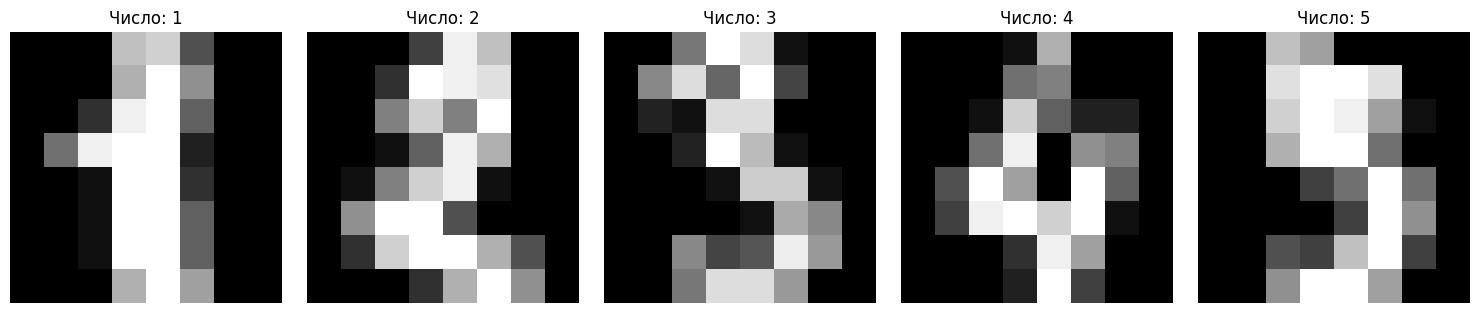

In [ ]:
# Визуализация всех цифр 1-5
plt.figure(figsize=(15, 6))

unique_labels = list(range(1, 6))
for i, label in enumerate(unique_labels):
    # Найдем первое вхождение каждой цифры
    idx = (y == label).argmax()
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[idx].reshape(8, 8), cmap='gray', interpolation='nearest')
    plt.title(f"Число: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
y

array([0, 1, 2, ..., 4, 4, 0])

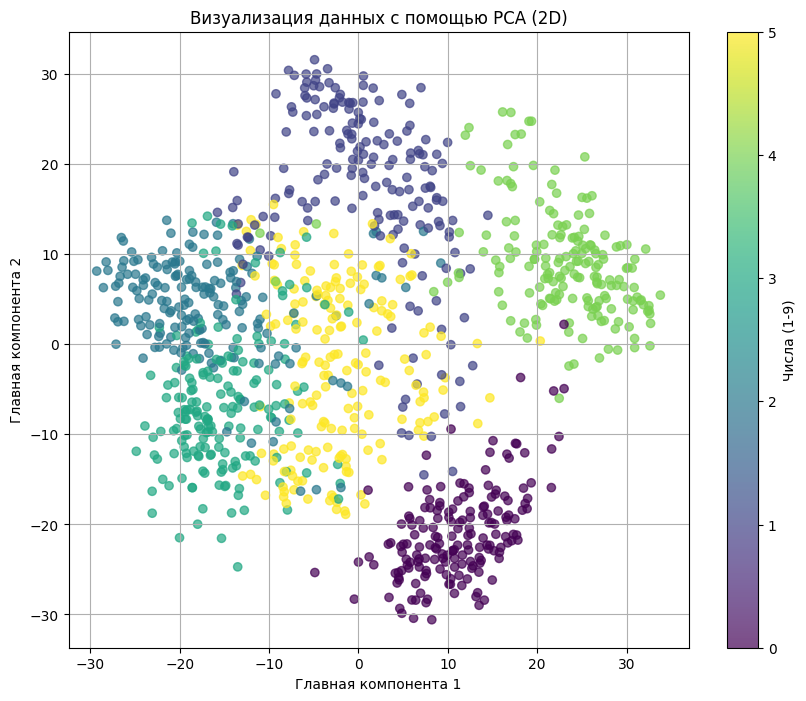

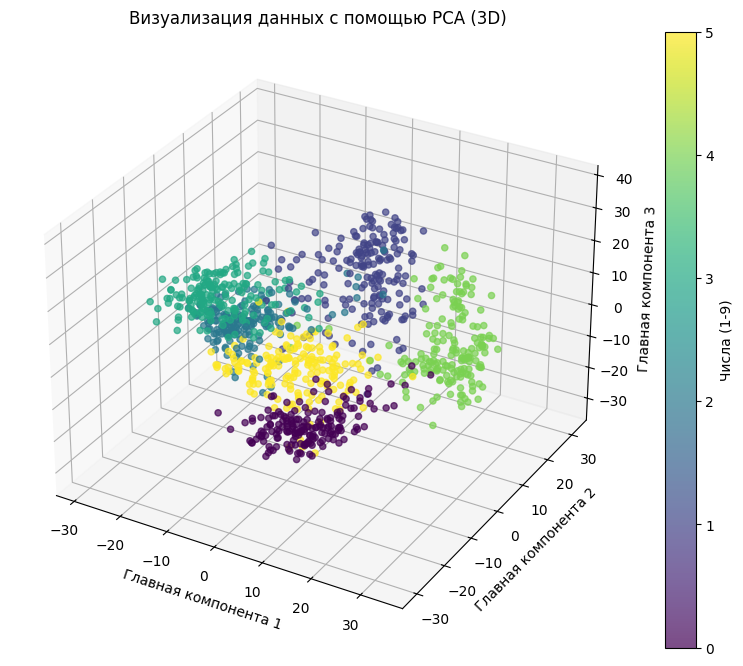

Точность классификации с PCA (2D): 0.8525
Точность классификации с PCA (3D): 0.9309


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# PCA: 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Числа (1-9)')
plt.title("Визуализация данных с помощью PCA (2D)")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.grid(True)
plt.show()

# PCA: 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Числа (1-9)')
ax.set_title("Визуализация данных с помощью PCA (3D)")
ax.set_xlabel("Главная компонента 1")
ax.set_ylabel("Главная компонента 2")
ax.set_zlabel("Главная компонента 3")
plt.show()

# Классификация на основе PCA (2D)
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_pca_2d, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_2d, y_train)
y_pred_2d = clf.predict(X_test_2d)
accuracy_pca_2d = accuracy_score(y_test, y_pred_2d)
print(f"Точность классификации с PCA (2D): {accuracy_pca_2d:.4f}")

# Классификация на основе PCA (3D)
X_train_3d, X_test_3d = train_test_split(X_pca_3d, test_size=0.2, random_state=42)
clf.fit(X_train_3d, y_train)
y_pred_3d = clf.predict(X_test_3d)
accuracy_pca_3d = accuracy_score(y_test, y_pred_3d)
print(f"Точность классификации с PCA (3D): {accuracy_pca_3d:.4f}")


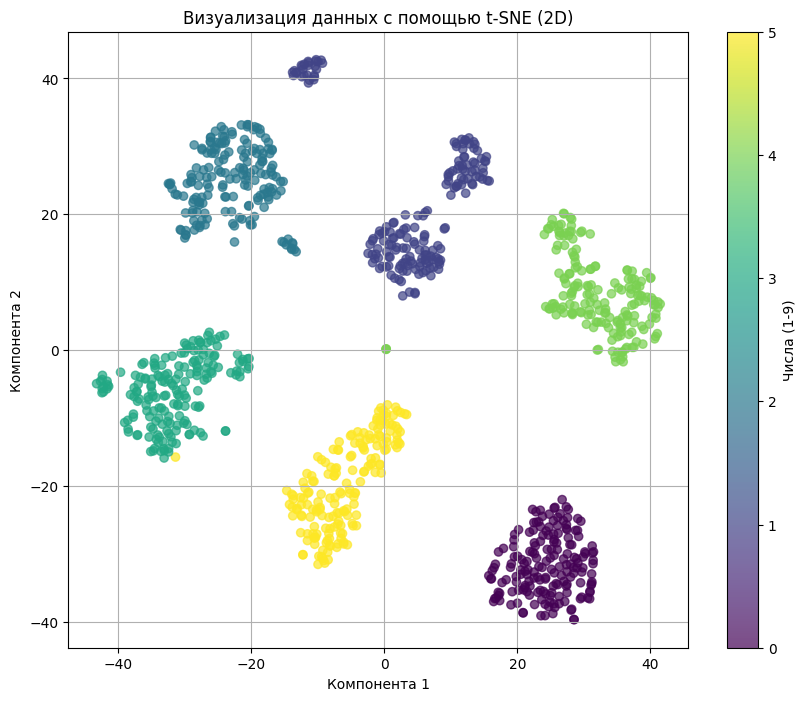

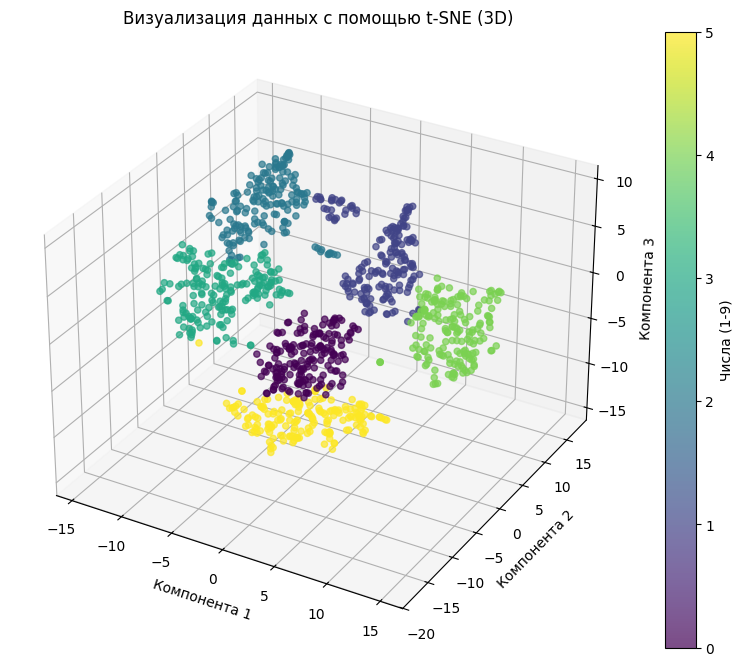

Точность классификации с t-SNE (2D): 1.0000
Точность классификации с t-SNE (3D): 1.0000


In [ ]:
from sklearn.manifold import TSNE

# t-SNE: 2D
tsne_2d = TSNE(n_components=2, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Числа (1-9)')
plt.title("Визуализация данных с помощью t-SNE (2D)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.grid(True)
plt.show()

# t-SNE: 3D
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Числа (1-9)')
ax.set_title("Визуализация данных с помощью t-SNE (3D)")
ax.set_xlabel("Компонента 1")
ax.set_ylabel("Компонента 2")
ax.set_zlabel("Компонента 3")
plt.show()

# Классификация на основе t-SNE (2D)
X_train_tsne_2d, X_test_tsne_2d = train_test_split(X_tsne_2d, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_tsne_2d, y_train)
y_pred_tsne_2d = clf.predict(X_test_tsne_2d)
accuracy_tsne_2d = accuracy_score(y_test, y_pred_tsne_2d)
print(f"Точность классификации с t-SNE (2D): {accuracy_tsne_2d:.4f}")

# Классификация на основе t-SNE (3D)
X_train_tsne_3d, X_test_tsne_3d = train_test_split(X_tsne_3d, test_size=0.2, random_state=42)
clf.fit(X_train_tsne_3d, y_train)
y_pred_tsne_3d = clf.predict(X_test_tsne_3d)
accuracy_tsne_3d = accuracy_score(y_test, y_pred_tsne_3d)
print(f"Точность классификации с t-SNE (3D): {accuracy_tsne_3d:.4f}")


### Поиск лучших параметров GridSearch и RandomSearch

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# Определение параметров для поиска
param_grid_regression = {
    'regressor__alpha': [0.1, 1.0, 10.0]  # Параметры регуляризации для Ridge
}

param_random_regression = {
    'regressor__alpha': np.linspace(0.1, 10, 100)  # Диапазон для случайного поиска
}

# Пайплайн для регрессии
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),
    ('regressor', Ridge())
], verbose=True)

# GridSearchCV для регрессии
grid_search_reg = GridSearchCV(regression_pipeline, param_grid=param_grid_regression, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_reg.fit(X_train_reg, y_train_reg)
print("\nЛучшие параметры (GridSearch) для регрессии:", grid_search_reg.best_params_)
print("Лучший MSE (GridSearch):", -grid_search_reg.best_score_)

# RandomizedSearchCV для регрессии
random_search_reg = RandomizedSearchCV(regression_pipeline, param_distributions=param_random_regression, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42)
random_search_reg.fit(X_train_reg, y_train_reg)
print("\nЛучшие параметры (RandomSearch) для регрессии:", random_search_reg.best_params_)
print("Лучший MSE (RandomSearch):", -random_search_reg.best_score_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.1s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransforme

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Определение параметров для поиска
param_grid_classification = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}

param_random_classification = {
    'classifier__max_depth': np.arange(1, 20),
    'classifier__min_samples_split': np.arange(2, 20)
}

# Пайплайн для классификации
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),
    ('classifier', DecisionTreeClassifier(random_state=42))
], verbose=True)

# GridSearchCV для классификации
grid_search_clf = GridSearchCV(classification_pipeline, param_grid=param_grid_classification, cv=5, scoring='accuracy', verbose=1)
grid_search_clf.fit(X_train_clf, y_train_clf)
print("\nЛучшие параметры (GridSearch) для классификации:", grid_search_clf.best_params_)
print("Лучшая точность (GridSearch):", grid_search_clf.best_score_)

# RandomizedSearchCV для классификации
random_search_clf = RandomizedSearchCV(classification_pipeline, param_distributions=param_random_classification, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)
random_search_clf.fit(X_train_clf, y_train_clf)
print("\nЛучшие параметры (RandomSearch) для классификации:", random_search_clf.best_params_)
print("Лучшая точность (RandomSearch):", random_search_clf.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipel

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[Colu

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Загрузка данных (предполагаем, что df уже загружен)
# Преобразование качества в бинарный признак
df['is_best_wine'] = (df['quality'].astype(int) > 5).astype(int)

# Удаляем `quality` из данных
X = df.drop(columns=['quality', 'is_best_wine'])
y = df['is_best_wine']

# Разделение признаков на числовые и категориальные
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование числовых данных
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# Преобразование категориальных данных
encoder = OneHotEncoder()
X_train_categorical = encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_features]).toarray()

# Объединение преобразованных данных
import numpy as np
X_train_transformed = np.hstack([X_train_numeric, X_train_categorical])
X_test_transformed = np.hstack([X_test_numeric, X_test_categorical])

# Определение параметров для RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Обучение RandomForestClassifier с RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    verbose=1
)

random_search.fit(X_train_transformed, y_train)

# Лучшие параметры и точность
best_params = random_search.best_params_
best_score = random_search.best_score_

# Тестирование на отложенной выборке
y_pred = random_search.best_estimator_.predict(X_test_transformed)
test_accuracy = accuracy_score(y_test, y_pred)

print("\nЛучшие параметры:", best_params)
print(f"Лучшая точность на кросс-валидации: {best_score:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Лучшие параметры: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
Лучшая точность на кросс-валидации: 0.8234
Точность на тестовой выборке: 0.8277
